In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [4]:
data=pd.read_csv('WHO.csv')
data.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,0.0,1140,0.0,0.0
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,0.0,8820,0.0,0.0
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,0.0,8310,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,0.00,82,3.2,75.49,0.0,0,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230,93.1,78.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  194 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            194 non-null    float64
 9   LiteracyRate                   194 non-null    float64
 10  GNI                            194 non-null    int64  
 11  PrimarySchoolEnrollmentMale    194 non-null    float64
 12  PrimarySchoolEnrollmentFemale  194 non-null    flo

In [6]:
data.drop(['FertilityRate','PrimarySchoolEnrollmentMale','PrimarySchoolEnrollmentFemale'], axis=1, inplace=True)


In [7]:
data.head()

,Country,Region,Population,Under15,Over60,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,60,98.5,54.26,0.0,1140
1,Albania,Europe,3162,21.33,14.93,74,16.7,96.39,0.0,8820
2,Algeria,Africa,38482,27.42,7.17,73,20.0,98.99,0.0,8310
3,Andorra,Europe,78,15.20,22.86,82,3.2,75.49,0.0,0
4,Angola,Africa,20821,47.58,3.84,51,163.5,48.38,70.1,5230


<AxesSubplot:ylabel='Density'>

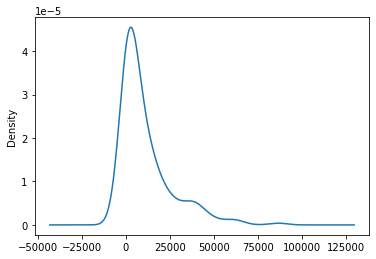

In [8]:
data['GNI'].plot(kind='kde')

<AxesSubplot:xlabel='GNI', ylabel='Density'>

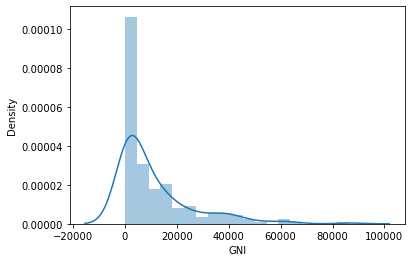

In [9]:
sns.distplot(data['GNI'])

In [10]:
data.describe()

,Population,Under15,Over60,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI
count,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.635997e+04,28.732423,11.163660,70.010309,36.148969,88.814639,44.444330,11123.659794
std,1.379031e+05,10.534573,7.149331,9.259075,37.992935,45.344327,43.779317,14735.106629
min,1.000000e+00,13.120000,0.810000,47.000000,2.200000,0.000000,0.000000,0.000000
25%,1.695750e+03,18.717500,5.200000,64.000000,8.425000,56.147500,0.000000,1195.000000
50%,7.790000e+03,28.650000,8.530000,72.500000,18.600000,94.315000,52.100000,4885.000000
75%,2.453525e+04,37.752500,16.687500,76.000000,55.975000,117.980000,92.125000,14617.500000
max,1.390000e+06,49.990000,31.920000,83.000000,181.600000,196.410000,99.800000,86440.000000


In [11]:
def iqr(df):
    q1,q3=np.percentile(df,[25,75])
    iqr=q3-q1
    return iqr,q3

In [12]:
iqr,q3=iqr(data['GNI'])


<AxesSubplot:xlabel='GNI'>

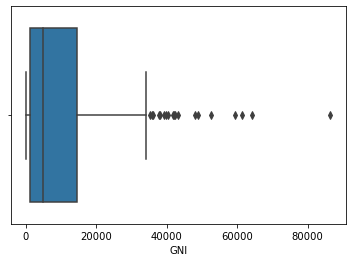

In [13]:
sns.boxplot(data['GNI'])

In [14]:
q3+1.5*iqr

34751.25

In [15]:
new_d=data[data['GNI']< q3+1.5*iqr]
new_d.head()

,Country,Region,Population,Under15,Over60,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,60,98.5,54.26,0.0,1140
1,Albania,Europe,3162,21.33,14.93,74,16.7,96.39,0.0,8820
2,Algeria,Africa,38482,27.42,7.17,73,20.0,98.99,0.0,8310
3,Andorra,Europe,78,15.20,22.86,82,3.2,75.49,0.0,0
4,Angola,Africa,20821,47.58,3.84,51,163.5,48.38,70.1,5230


In [16]:
new_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 193
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              175 non-null    object 
 1   Region               175 non-null    object 
 2   Population           175 non-null    int64  
 3   Under15              175 non-null    float64
 4   Over60               175 non-null    float64
 5   LifeExpectancy       175 non-null    int64  
 6   ChildMortality       175 non-null    float64
 7   CellularSubscribers  175 non-null    float64
 8   LiteracyRate         175 non-null    float64
 9   GNI                  175 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 15.0+ KB


In [17]:
Q1,Q3=np.percentile(data['Population'],[25,75])

In [18]:
IQR=Q3-Q1

In [19]:
new_data=new_d[data['Population']< Q3+ 1.5*IQR]

In [20]:
new_data.shape

(157, 10)

In [21]:
new_data.head()

,Country,Region,Population,Under15,Over60,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,60,98.5,54.26,0.0,1140
1,Albania,Europe,3162,21.33,14.93,74,16.7,96.39,0.0,8820
2,Algeria,Africa,38482,27.42,7.17,73,20.0,98.99,0.0,8310
3,Andorra,Europe,78,15.20,22.86,82,3.2,75.49,0.0,0
4,Angola,Africa,20821,47.58,3.84,51,163.5,48.38,70.1,5230


In [47]:
y=new_data['LifeExpectancy']
x=new_data.loc[:,data.columns!='LifeExpectancy']
x.shape

(157, 9)

In [49]:
x.select_dtypes('O').value_counts()

Country        Region               
Afghanistan    Eastern Mediterranean    1
Peru           Americas                 1
Niger          Africa                   1
Niue           Western Pacific          1
Oman           Eastern Mediterranean    1
                                       ..
Grenada        Americas                 1
Guatemala      Americas                 1
Guinea         Africa                   1
Guinea-Bissau  Africa                   1
Zimbabwe       Africa                   1
Length: 157, dtype: int64

In [27]:
x_d=pd.get_dummies(x)
x_d.head()

,Population,Under15,Over60,ChildMortality,CellularSubscribers,LiteracyRate,GNI,Country_Afghanistan,Country_Albania,Country_Algeria,...,Country_Venezuela (Bolivarian Republic of),Country_Yemen,Country_Zambia,Country_Zimbabwe,Region_Africa,Region_Americas,Region_Eastern Mediterranean,Region_Europe,Region_South-East Asia,Region_Western Pacific
0,29825,47.42,3.82,98.5,54.26,0.0,1140,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3162,21.33,14.93,16.7,96.39,0.0,8820,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38482,27.42,7.17,20.0,98.99,0.0,8310,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,78,15.20,22.86,3.2,75.49,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,20821,47.58,3.84,163.5,48.38,70.1,5230,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
x_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 193
Columns: 170 entries, Population to Region_Western Pacific
dtypes: float64(5), int64(2), uint8(163)
memory usage: 34.8 KB


In [31]:
x_d.reset_index(drop=True, inplace= True)

In [35]:
dummy=x_d.select_dtypes('uint8')
dummy.head()

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Azerbaijan,Country_Bahamas,...,Country_Venezuela (Bolivarian Republic of),Country_Yemen,Country_Zambia,Country_Zimbabwe,Region_Africa,Region_Americas,Region_Eastern Mediterranean,Region_Europe,Region_South-East Asia,Region_Western Pacific
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
x_n=x_d.select_dtypes(['float64','int64'])

In [39]:
sca=StandardScaler()
x_new=pd.DataFrame(data=sca.fit_transform(x_n),columns=x_n.columns)

In [40]:
x_new.head()

,Population,Under15,Over60,ChildMortality,CellularSubscribers,LiteracyRate,GNI
0,1.440392,1.670178,-0.993452,1.544686,-0.679493,-1.130528,-0.732466
1,-0.586588,-0.867036,0.748069,-0.596698,0.249361,-1.130528,0.203917
2,2.098516,-0.274792,-0.468331,-0.510310,0.306684,-1.130528,0.141736
3,-0.821040,-1.463169,1.991117,-0.950105,-0.211428,-1.130528,-0.871460
4,0.755888,1.685738,-0.990317,3.246275,-0.809131,0.486609,-0.233793


In [41]:
final=pd.concat((x_new,dummy), axis=1)

In [45]:
final.head()

,Population,Under15,Over60,ChildMortality,CellularSubscribers,LiteracyRate,GNI,Country_Afghanistan,Country_Albania,Country_Algeria,...,Country_Venezuela (Bolivarian Republic of),Country_Yemen,Country_Zambia,Country_Zimbabwe,Region_Africa,Region_Americas,Region_Eastern Mediterranean,Region_Europe,Region_South-East Asia,Region_Western Pacific
0,1.440392,1.670178,-0.993452,1.544686,-0.679493,-1.130528,-0.732466,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.586588,-0.867036,0.748069,-0.596698,0.249361,-1.130528,0.203917,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2.098516,-0.274792,-0.468331,-0.510310,0.306684,-1.130528,0.141736,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,-0.821040,-1.463169,1.991117,-0.950105,-0.211428,-1.130528,-0.871460,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.755888,1.685738,-0.990317,3.246275,-0.809131,0.486609,-0.233793,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
x_train,x_test,y_train,y_test=train_test_split(final,y,test_size=0.3,random_state=4)

In [51]:
model1=LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [52]:
pre1=model1.predict(x_test)

In [53]:
model1.score(x_train, y_train)

1.0

In [54]:
model1.score(x_test, y_test)

0.8630415402569149